In [161]:
import pandas as pd
from scipy.stats import spearmanr

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Make figures look good for hi-res displays.

In [162]:
df = pd.read_json('/data/diffusion/cdc_userstreams_top_25_retweeted_2020-06-05.json')
df.head(2)

,id,created_at,username,followers_count,followers_count_cumsum,text,top_N
0,1253786397288173568,2020-04-24 20:42:25+00:00,ronnie_rudolph,64,9952898,Household cleaners and disinfectants can cause...,1
1,1254038937825402880,2020-04-25 13:25:56+00:00,stewonthis1,11238,15751053,Household cleaners and disinfectants can cause...,1


For each retweeter present in both stream A and stream B, create a table with the rank in stream A and the rank in stream B

In [178]:
#Pick a time period, say 1 hour or 24 hours, for the calculations. We examine all retweets between Trump’s initial tweet and the end of the time period.
WINDOW = 1 #hours

retweets_after_trump = {}

for t, retweets in df.groupby('top_N'):
    retweets.sort_values(by='created_at').reindex()
    index_of_trump_retweet = retweets[retweets.username == 'realDonaldTrump'].index
    if index_of_trump_retweet.any() > 0:
        print("Tweet TopN #: {}; ".format(t), end="")
        tweet = retweets.loc[min(index_of_trump_retweet)]
        print('@realDonaldTrump retweeted at '+ str( tweet.created_at))
        
        max_time = tweet.created_at + pd.Timedelta(hours=WINDOW)
        
        in_window = retweets[(retweets.created_at > tweet.created_at ) & (retweets.created_at <= max_time)]
        print(str(len(in_window)) + " retweets in {} hour(s) after Trump".format(WINDOW)+"\n")
        
        retweets_after_trump[t] = pd.DataFrame.copy(in_window)

Tweet TopN #: 2; @realDonaldTrump retweeted at 2020-04-25 13:04:07+00:00
798 retweets in 1 hour(s) after Trump

Tweet TopN #: 3; @realDonaldTrump retweeted at 2020-04-25 13:08:14+00:00
956 retweets in 1 hour(s) after Trump

Tweet TopN #: 4; @realDonaldTrump retweeted at 2020-05-25 02:29:05+00:00
973 retweets in 1 hour(s) after Trump

Tweet TopN #: 5; @realDonaldTrump retweeted at 2020-05-01 23:28:32+00:00
739 retweets in 1 hour(s) after Trump

Tweet TopN #: 6; @realDonaldTrump retweeted at 2020-04-25 13:05:26+00:00
815 retweets in 1 hour(s) after Trump

Tweet TopN #: 7; @realDonaldTrump retweeted at 2020-04-25 12:12:10+00:00
993 retweets in 1 hour(s) after Trump

Tweet TopN #: 8; @realDonaldTrump retweeted at 2020-04-25 13:05:51+00:00
807 retweets in 1 hour(s) after Trump

Tweet TopN #: 10; @realDonaldTrump retweeted at 2020-04-25 12:12:52+00:00
977 retweets in 1 hour(s) after Trump

Tweet TopN #: 11; @realDonaldTrump retweeted at 2020-04-25 13:07:15+00:00
773 retweets in 1 hour(s) aft

In [208]:
# Calculate the percentage of tweeters that are present in both streams:
# %similar= #present in both A and B / (min (count(a),count(b))
def calculate_similarity_of_tweeters_in_two_streams(streamA, streamB):
    return len( set(streamA.username) & set(streamB.username) ) / min(len(streamA),len(streamB) )* 100

# Pick two different retweet streams, say A and B.
# Rank the twitter users retweeting Trump in time order.  First retweeter = 1, second= 2, etc. for stream A and then separately for stream B
def rank_twitterers(streamA, streamB):
    
    users = set(streamA.username) & set(streamB.username)
    
    p_similar = calculate_similarity_of_tweeters_in_two_streams(streamA,streamB);

    if p_similar > 70:
        print("The % similar is: {:.2f} with {} users in both streams".format(p_similar, len(users)))
    
        #Now remove users from each stream that aren't present in both.
        A = list( streamA[ streamA.username.apply(lambda u: u in users) ].username )
        B = list( streamB[ streamB.username.apply(lambda u: u in users) ].username )

        to_return = []

        for u in list(users):
            to_return.append(
            {'user':u, 'rankInA':A.index(u), 'rankInB' : B.index(u)})


        thisDF = pd.DataFrame(to_return)

        sr = spearmanr(thisDF.rankInA, thisDF.rankInB)
        print(sr)

        return thisDF, sr
    else:
        return None, None

In [209]:
df2, sr = rank_twitterers(retweets_after_trump[8], retweets_after_trump[15])

The % similar is: 81.60 with 519 users in both streams
SpearmanrResult(correlation=0.6442449754588484, pvalue=3.4249410245548245e-62)


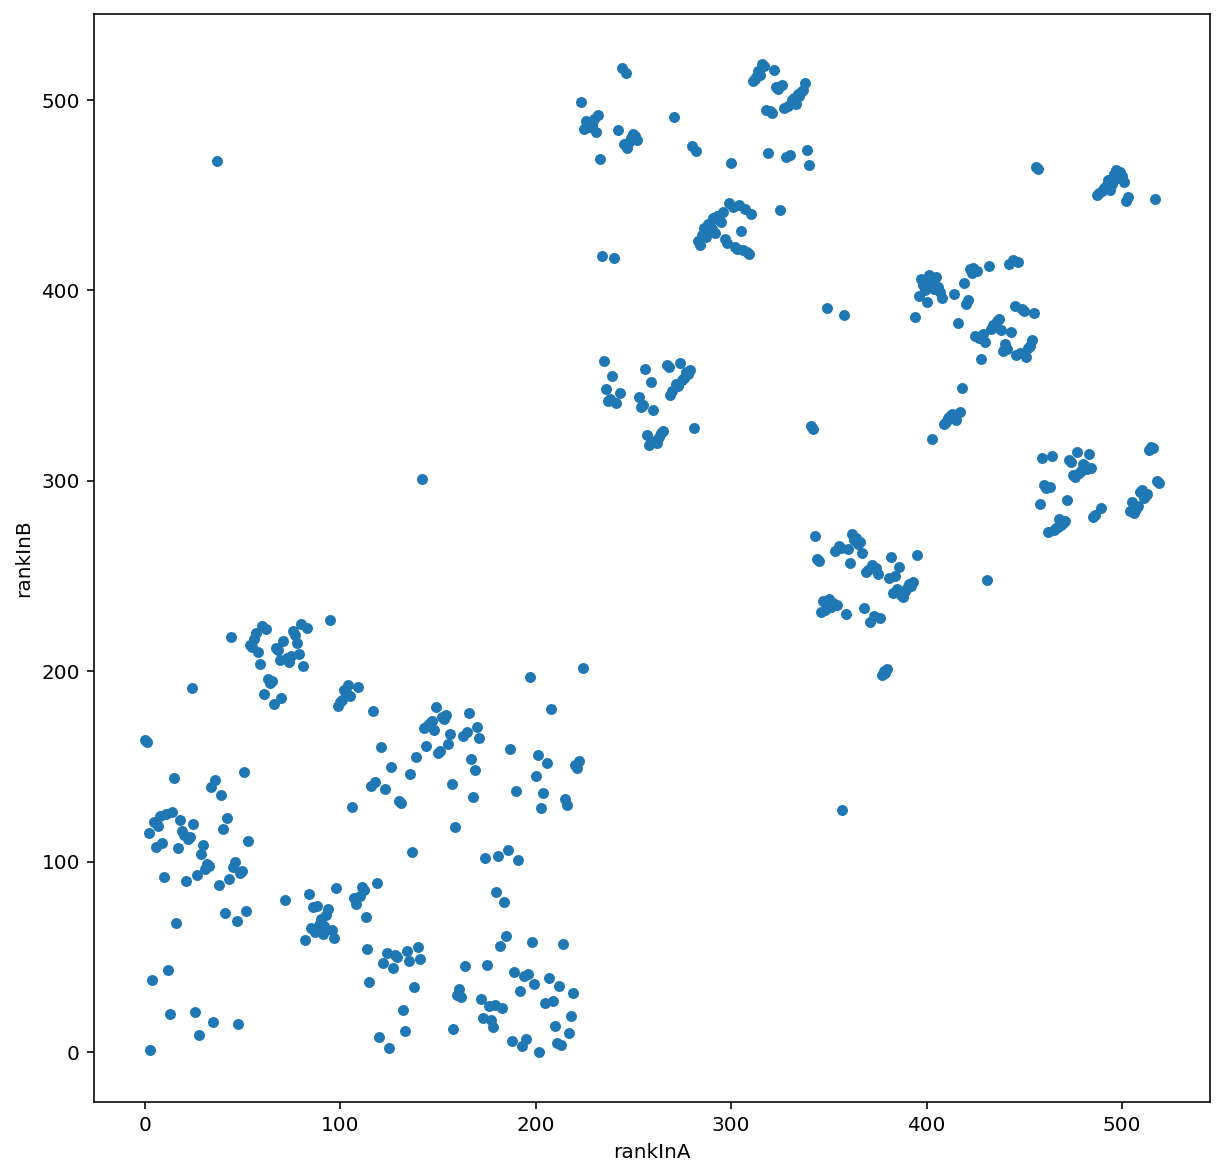

In [211]:
ax = df2.plot(kind='scatter',x='rankInA',y='rankInB', figsize=(10,10))

Tweets: 2, 3
--------------------

Tweets: 2, 4
--------------------

Tweets: 2, 5
--------------------

Tweets: 2, 6
--------------------

Tweets: 2, 7
--------------------

Tweets: 2, 8
--------------------

Tweets: 2, 10
--------------------

Tweets: 2, 11
--------------------

Tweets: 2, 12
--------------------

Tweets: 2, 13
--------------------
The % similar is: 73.20 with 497 users in both streams
SpearmanrResult(correlation=0.11158967016244377, pvalue=0.0128017000303262)

Tweets: 2, 14
--------------------
The % similar is: 73.19 with 486 users in both streams
SpearmanrResult(correlation=-0.35956892701390536, pvalue=2.799656920279877e-16)

Tweets: 2, 15
--------------------
The % similar is: 74.37 with 473 users in both streams
SpearmanrResult(correlation=0.250194248255848, pvalue=3.489408610405233e-08)

Tweets: 3, 4
--------------------

Tweets: 3, 5
--------------------

Tweets: 3, 6
--------------------

Tweets: 3, 7
--------------------

Tweets: 3, 8
--------------------

T

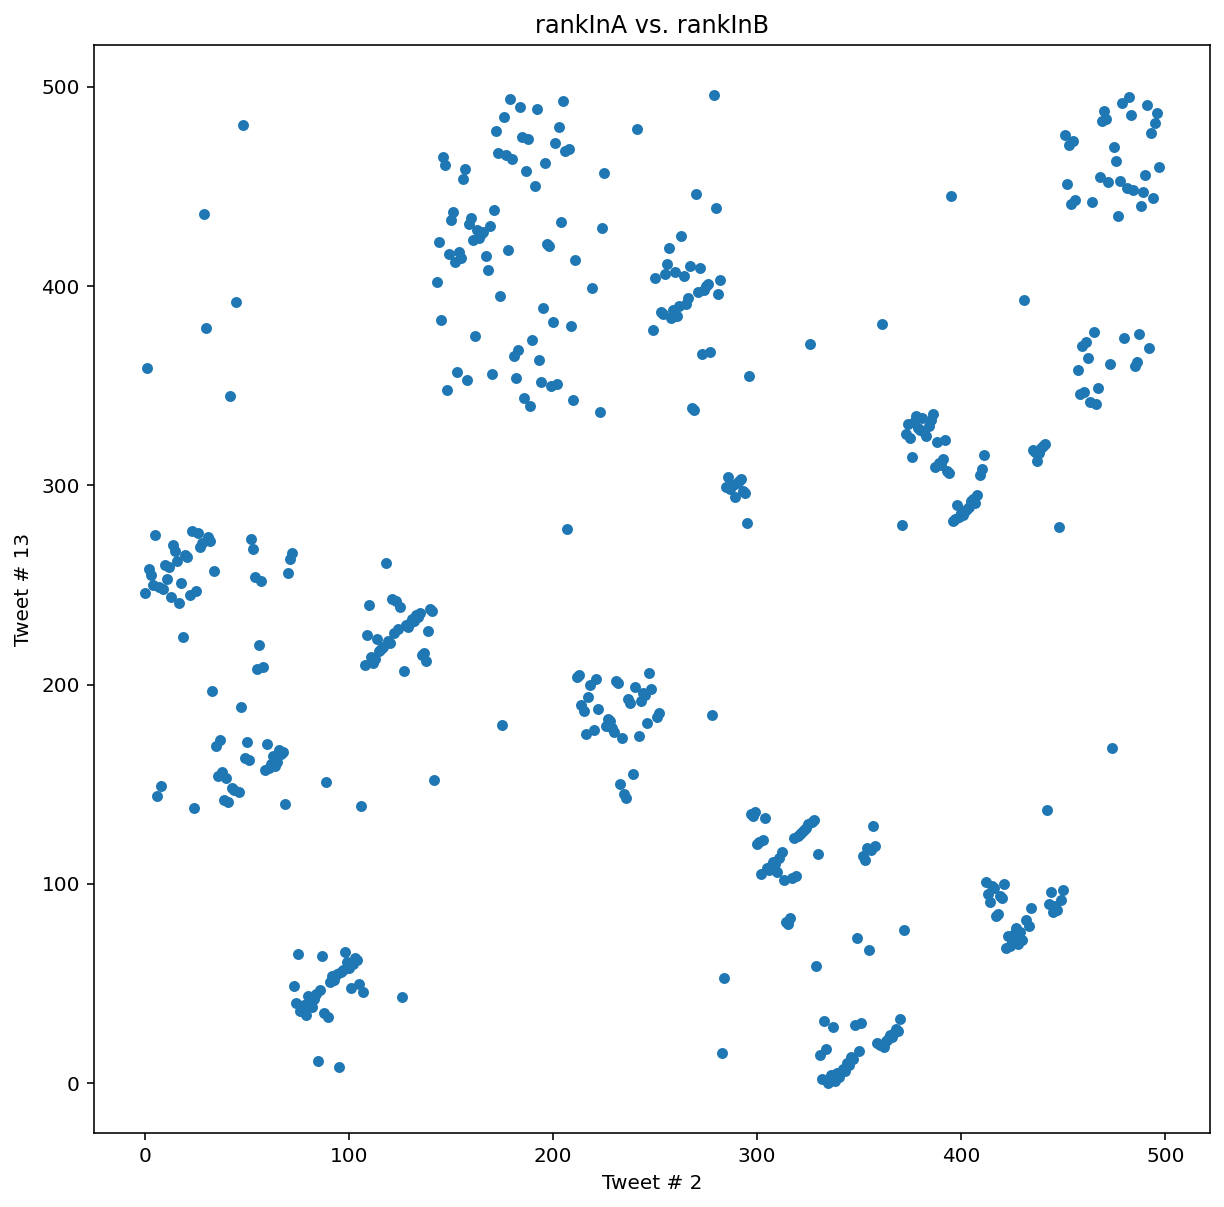

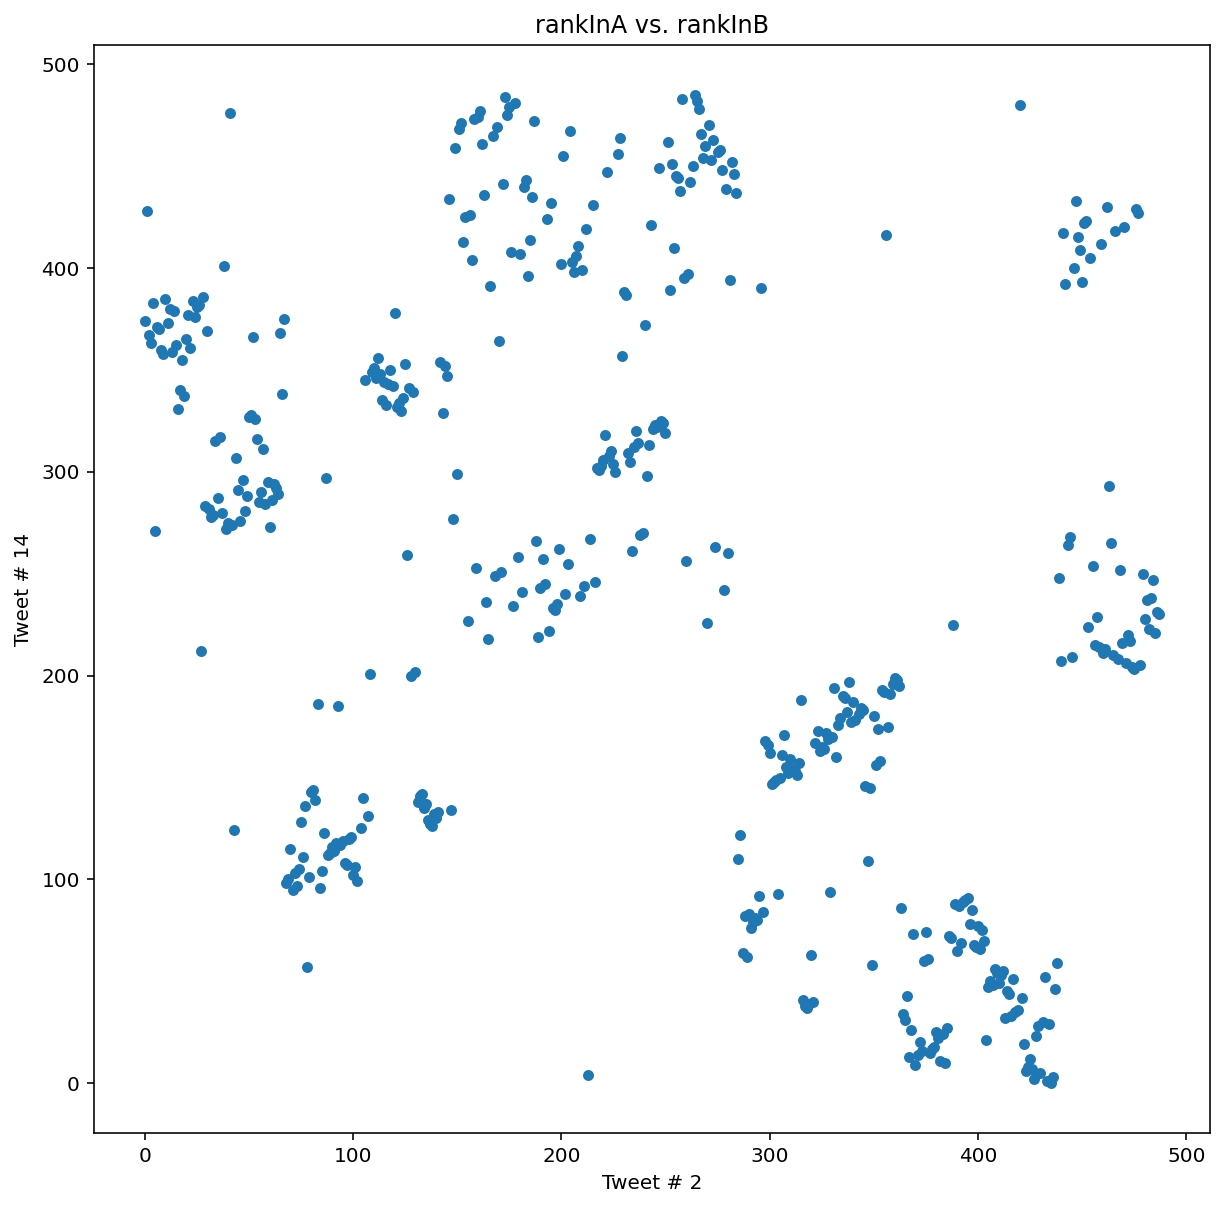

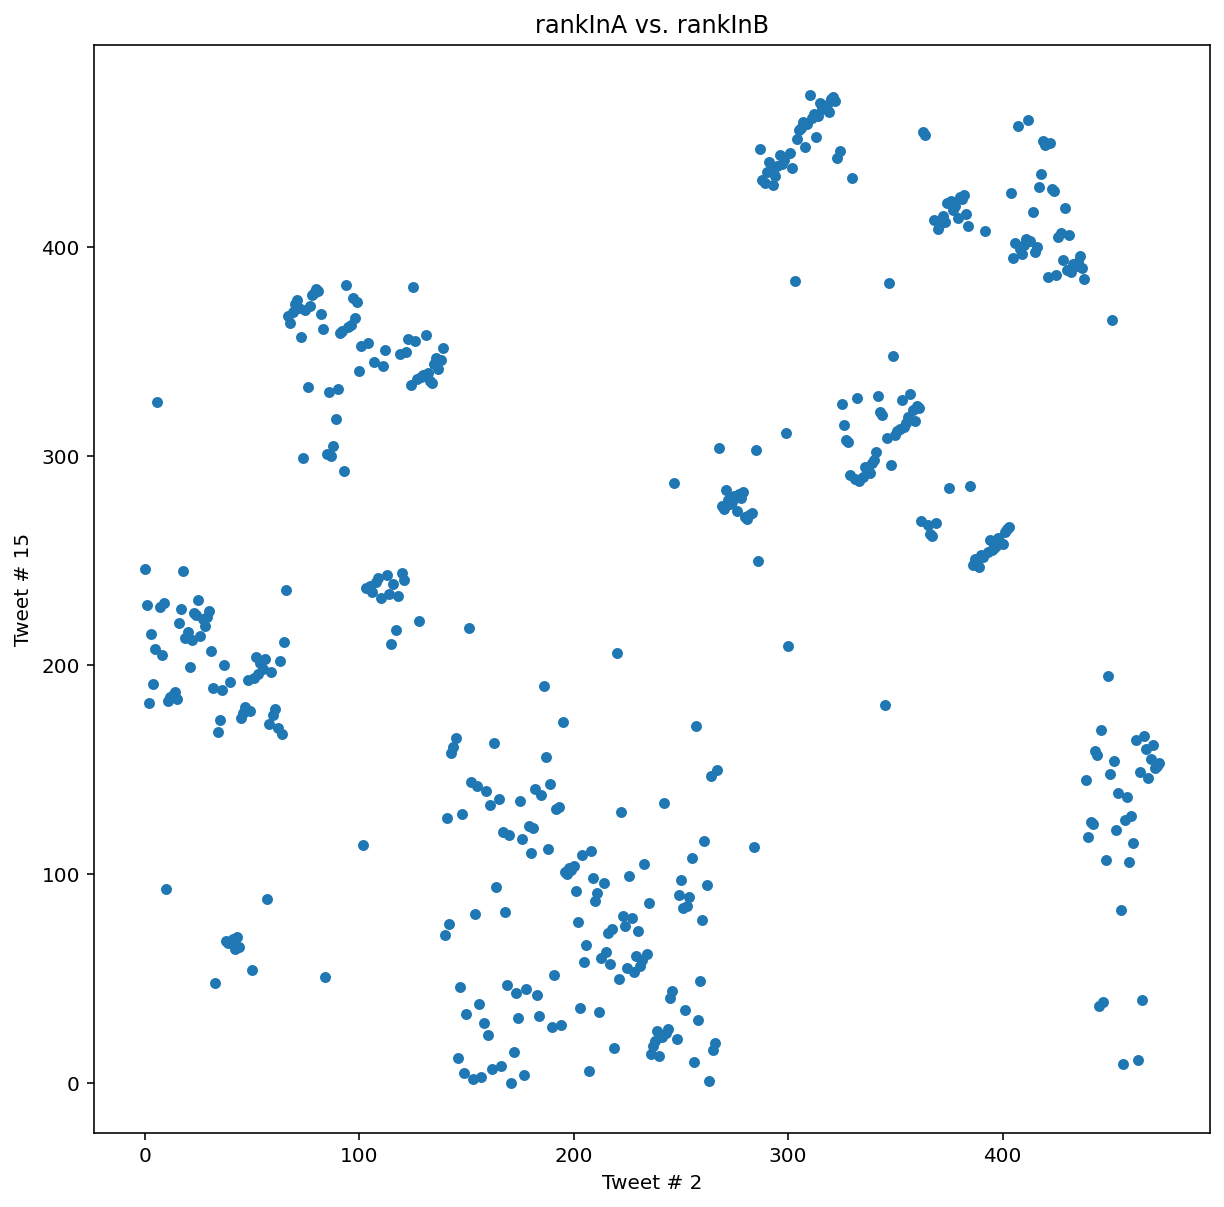

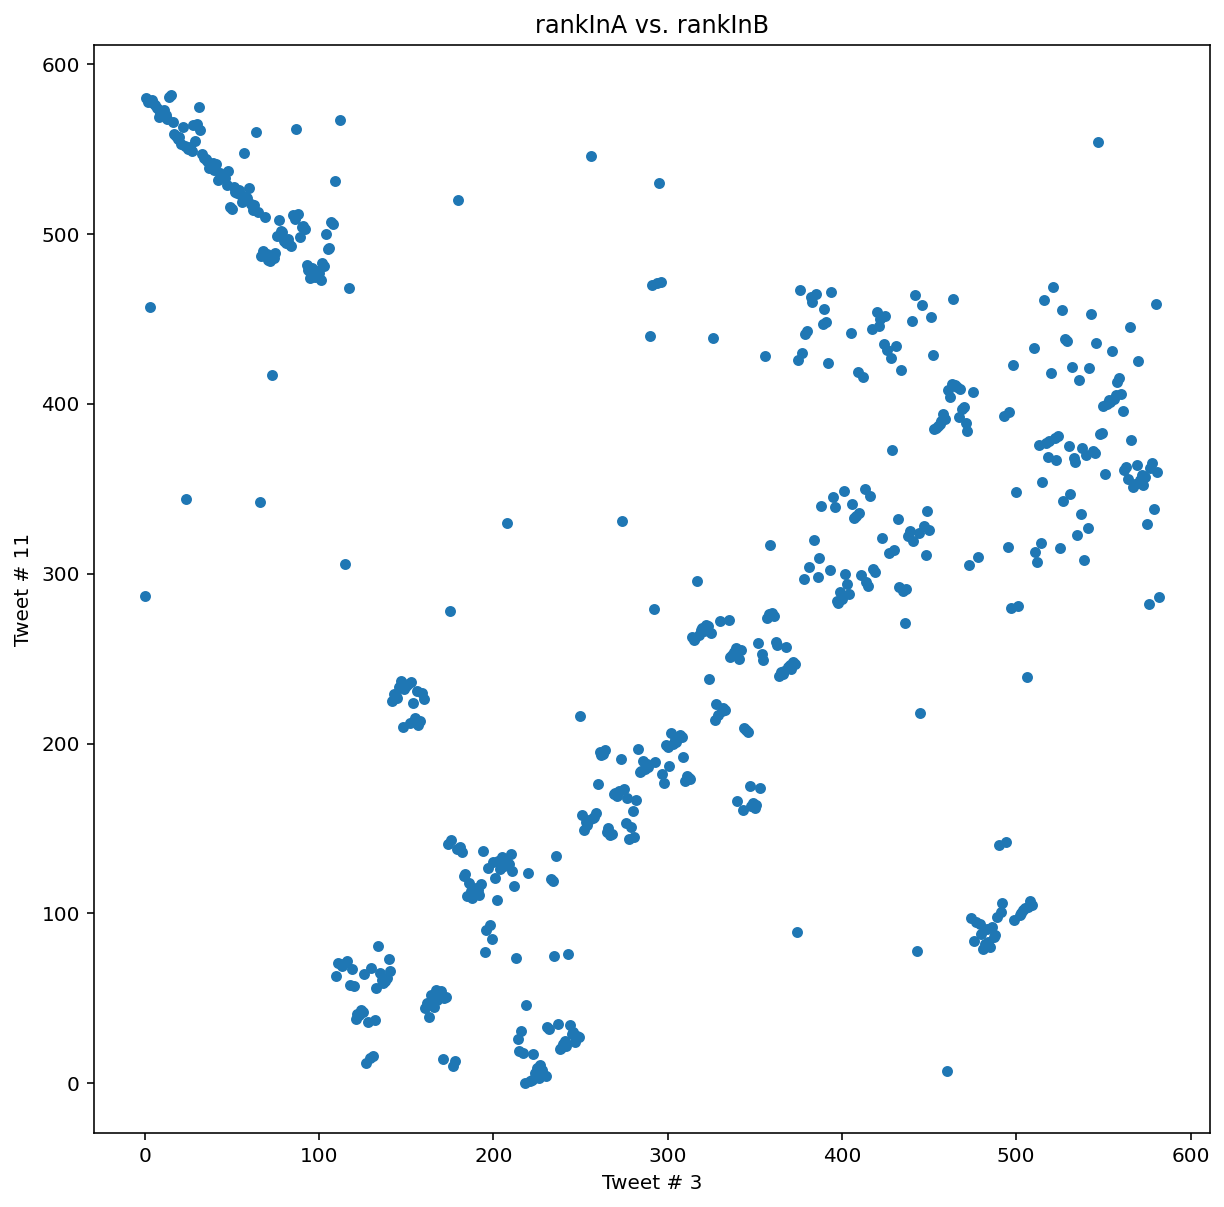

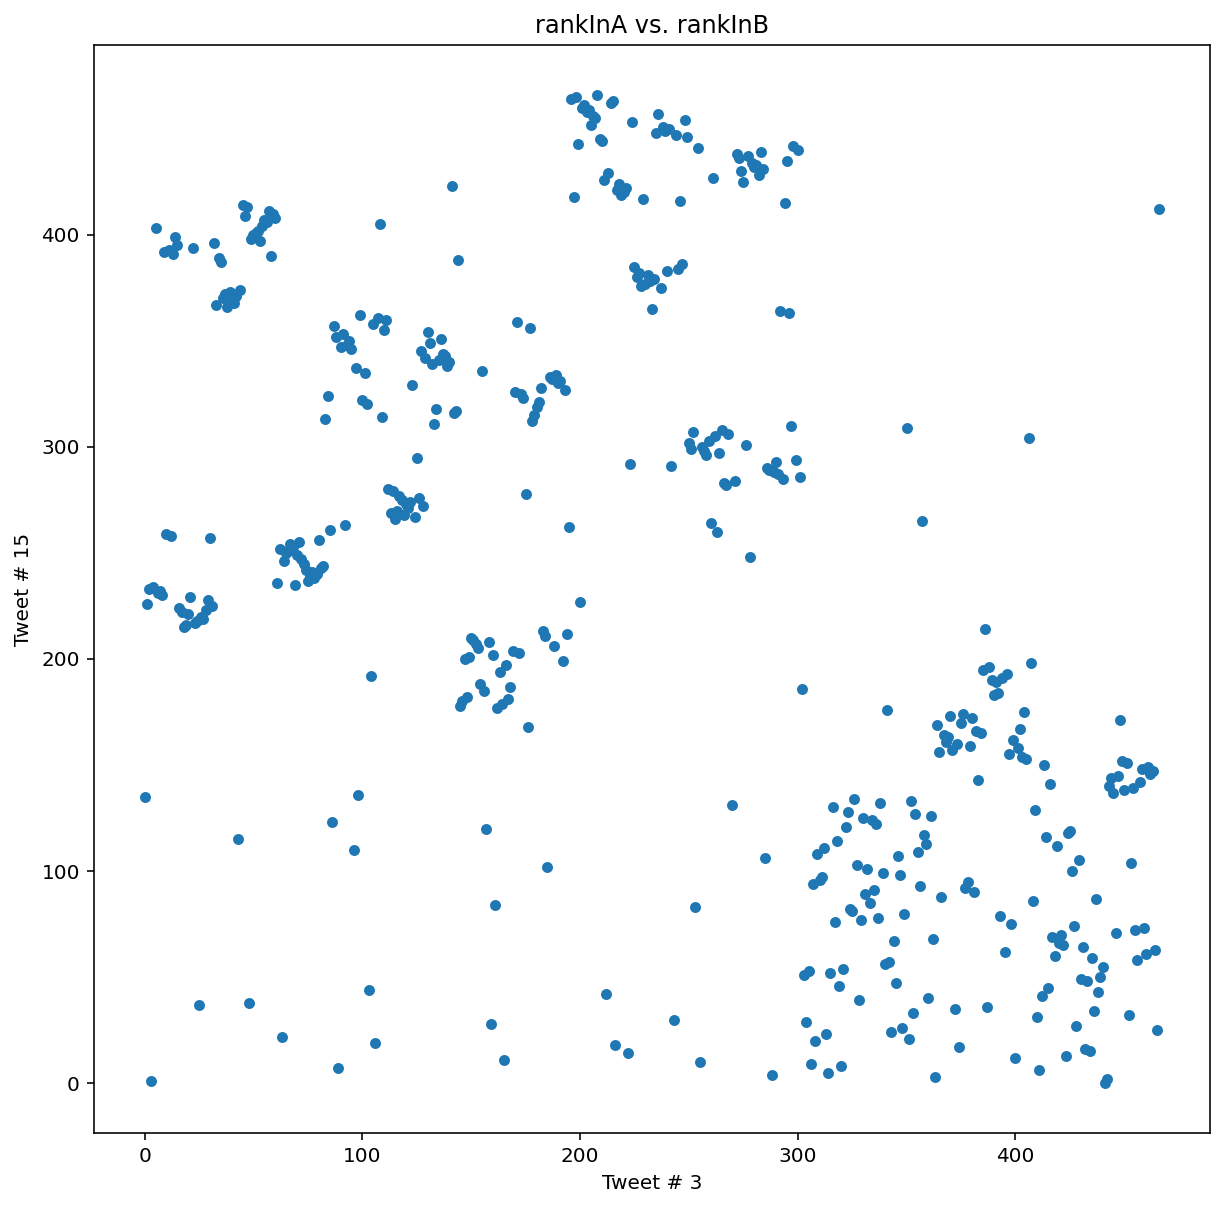

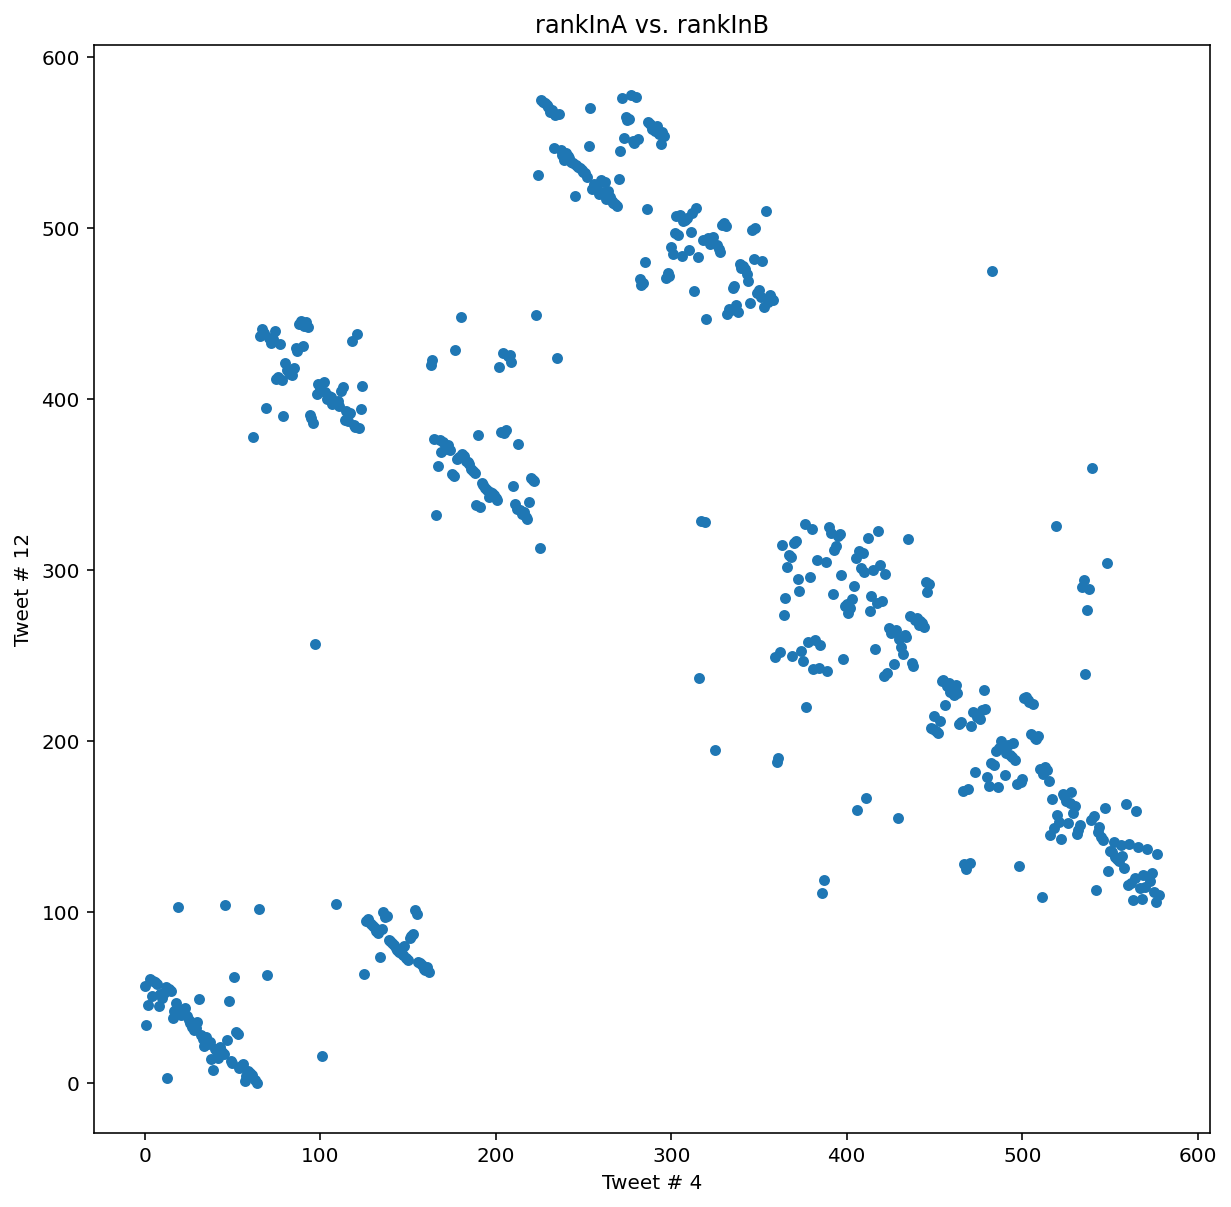

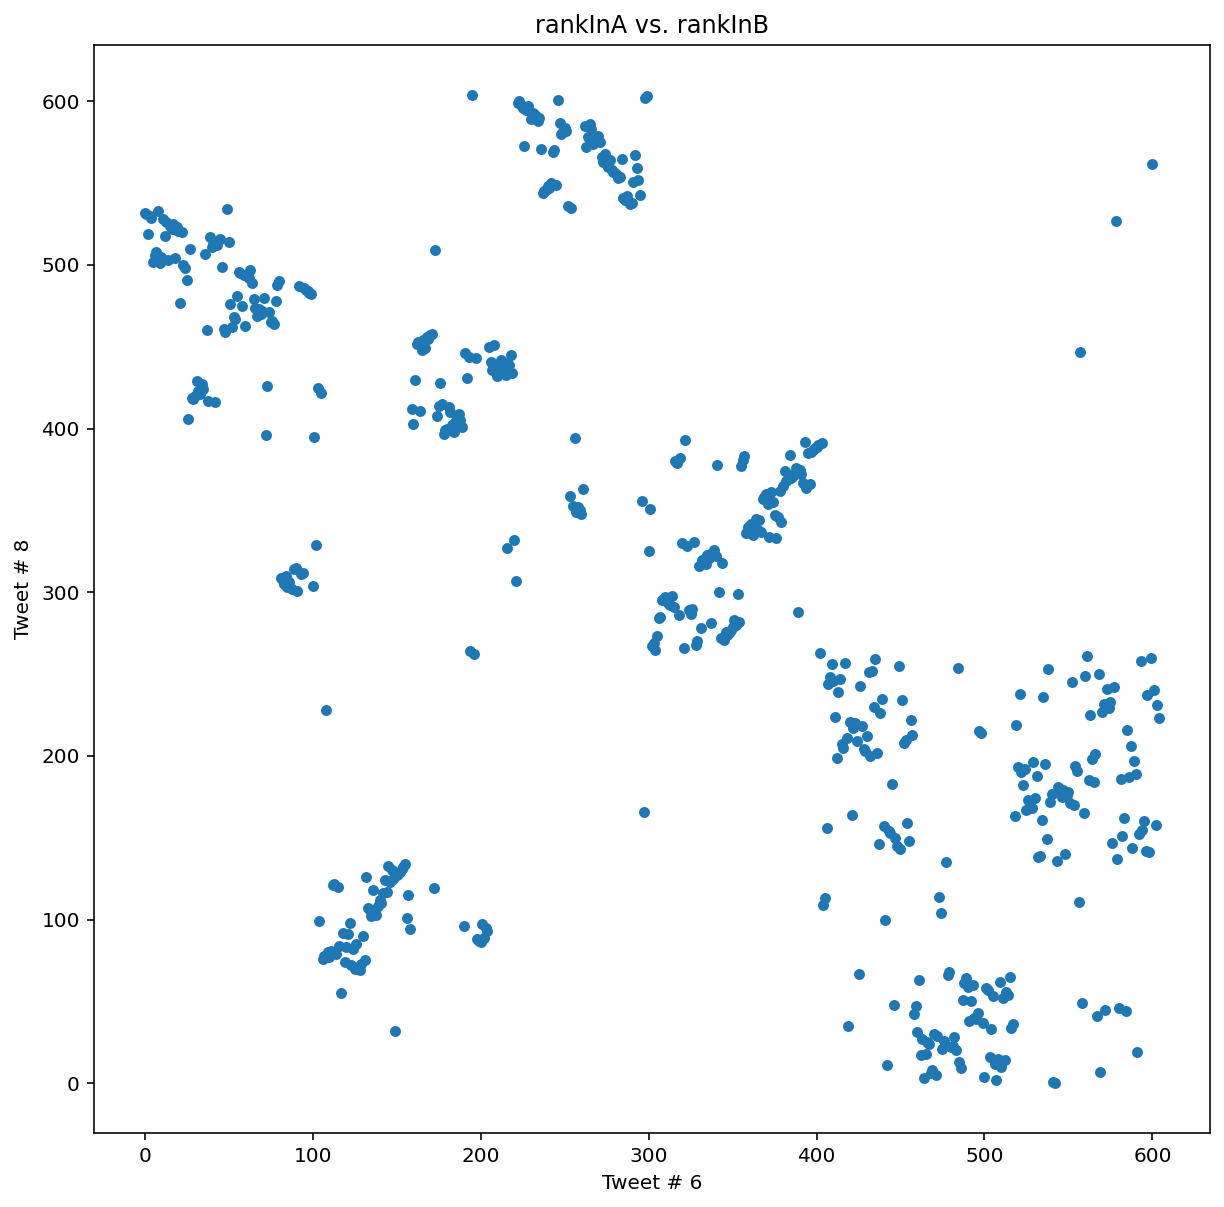

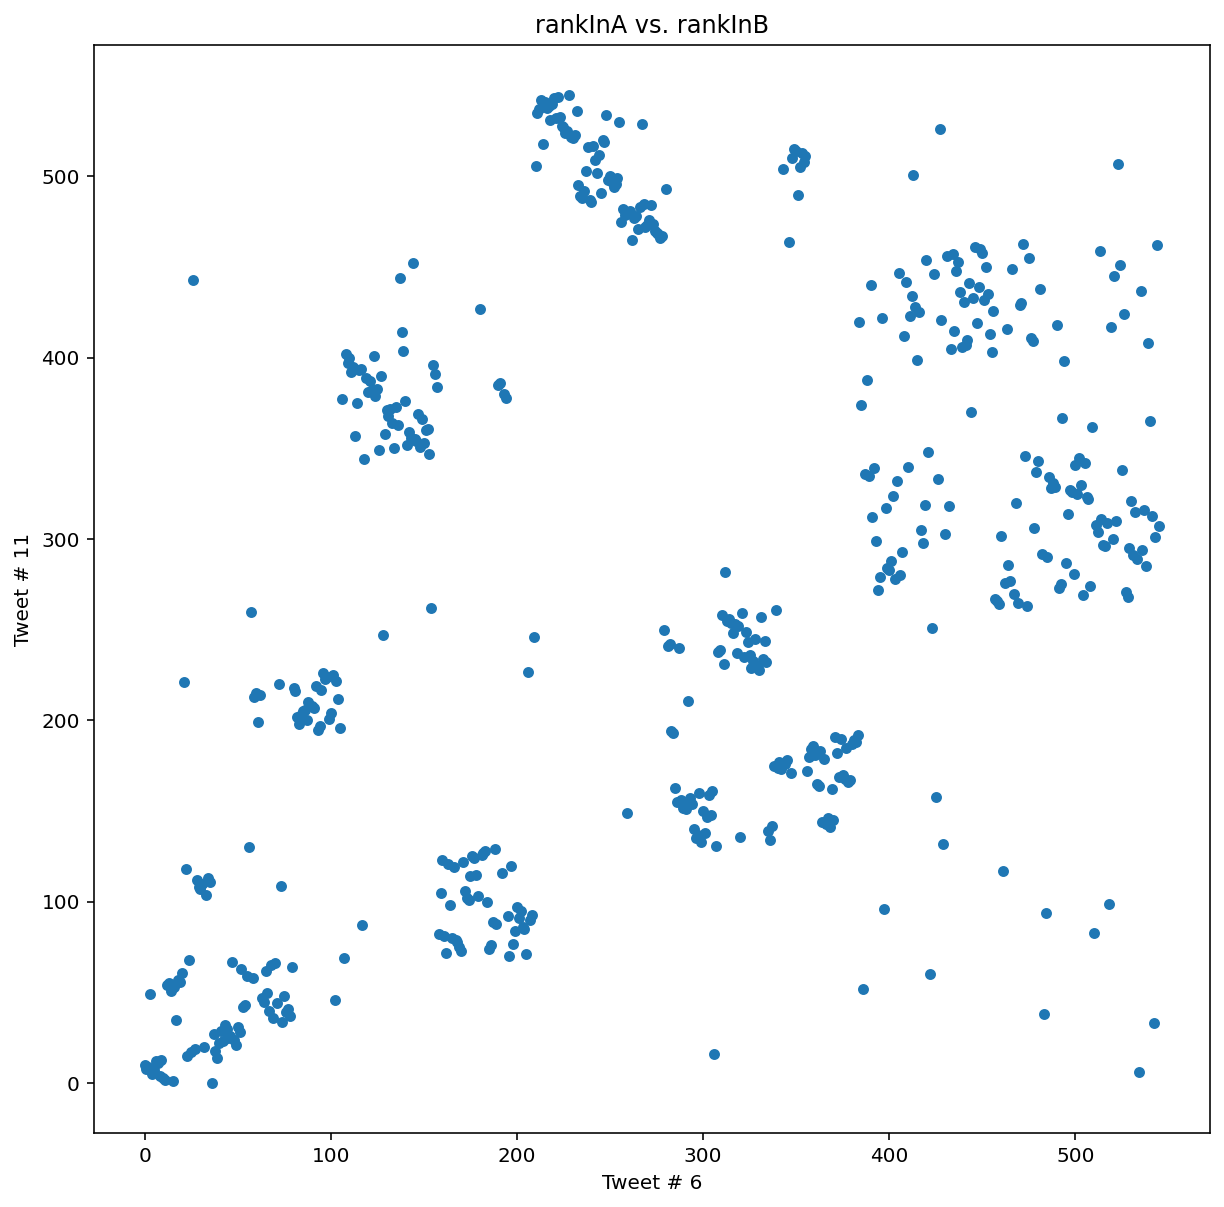

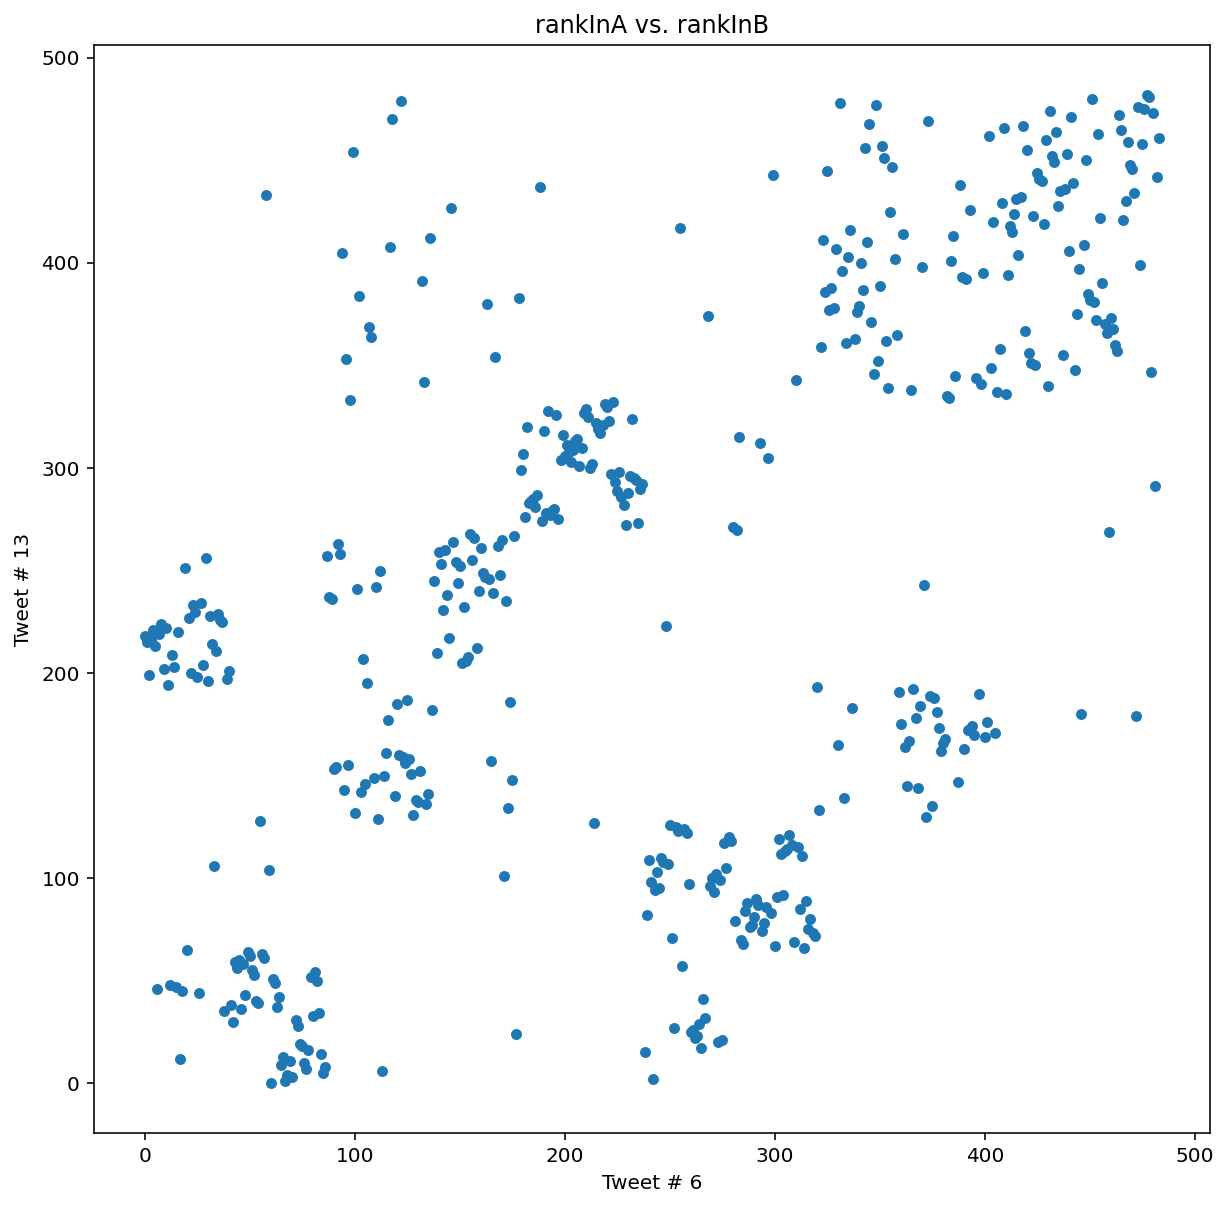

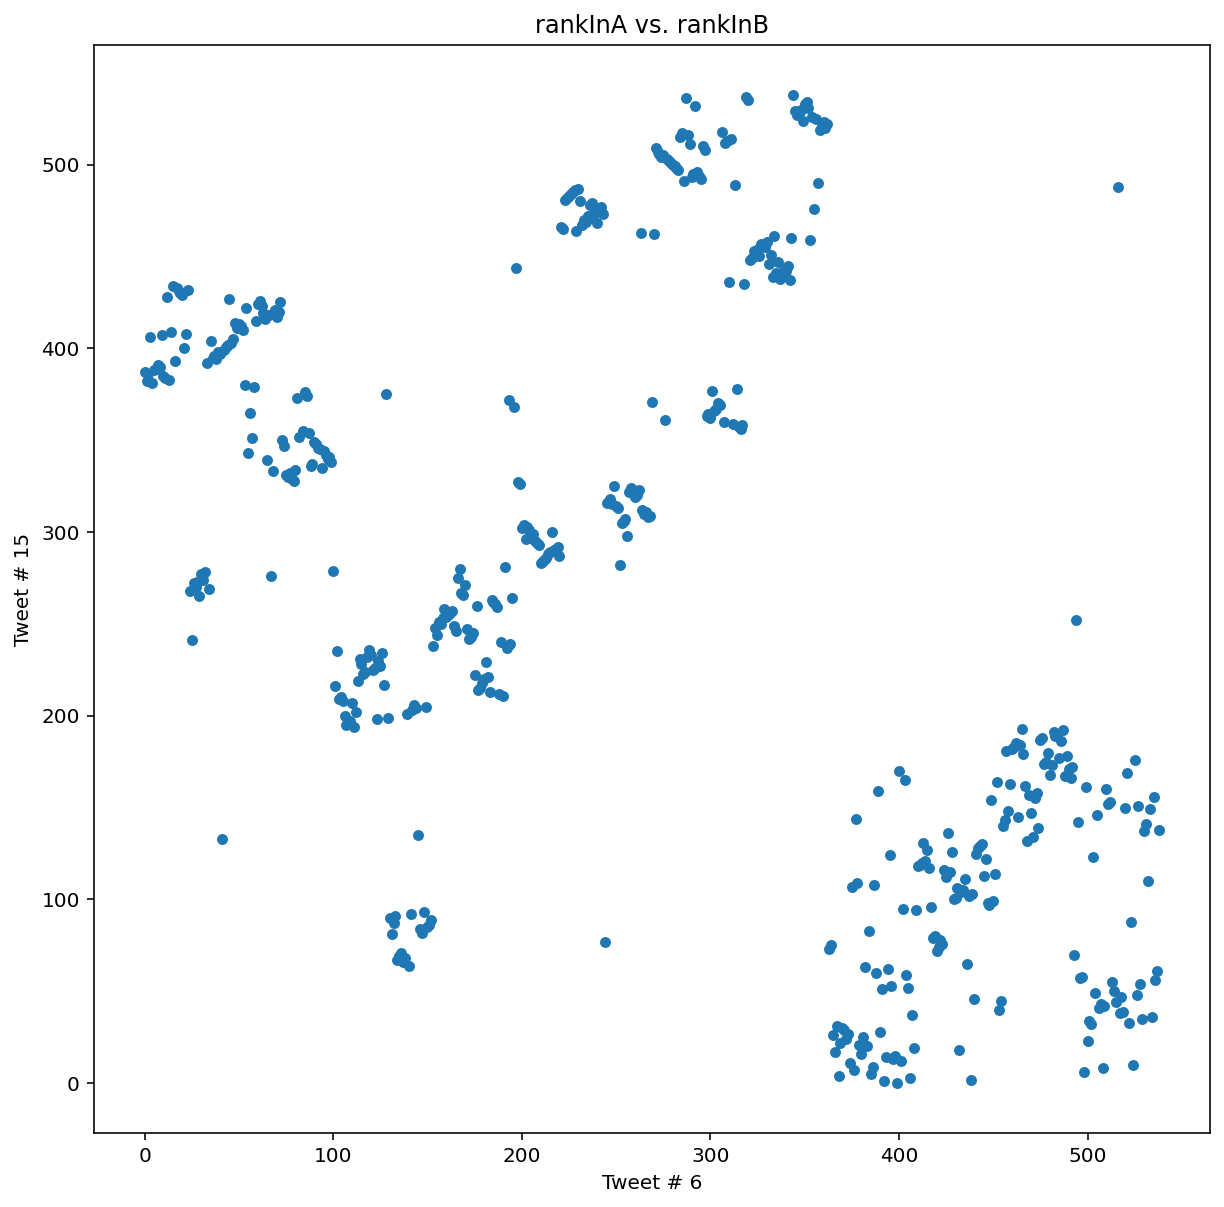

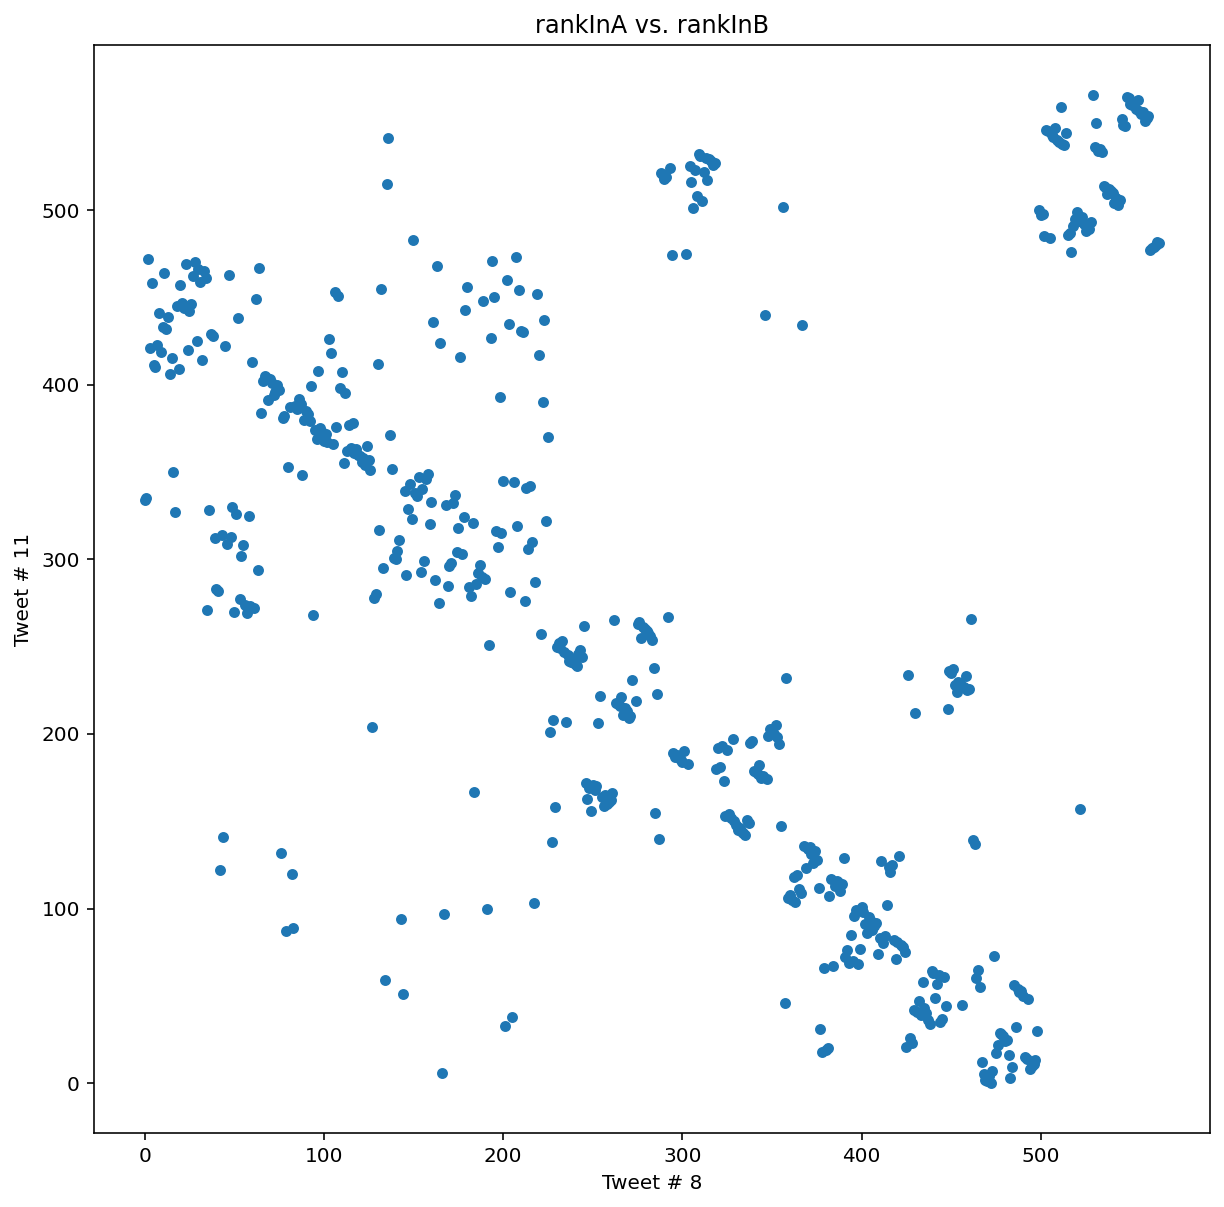

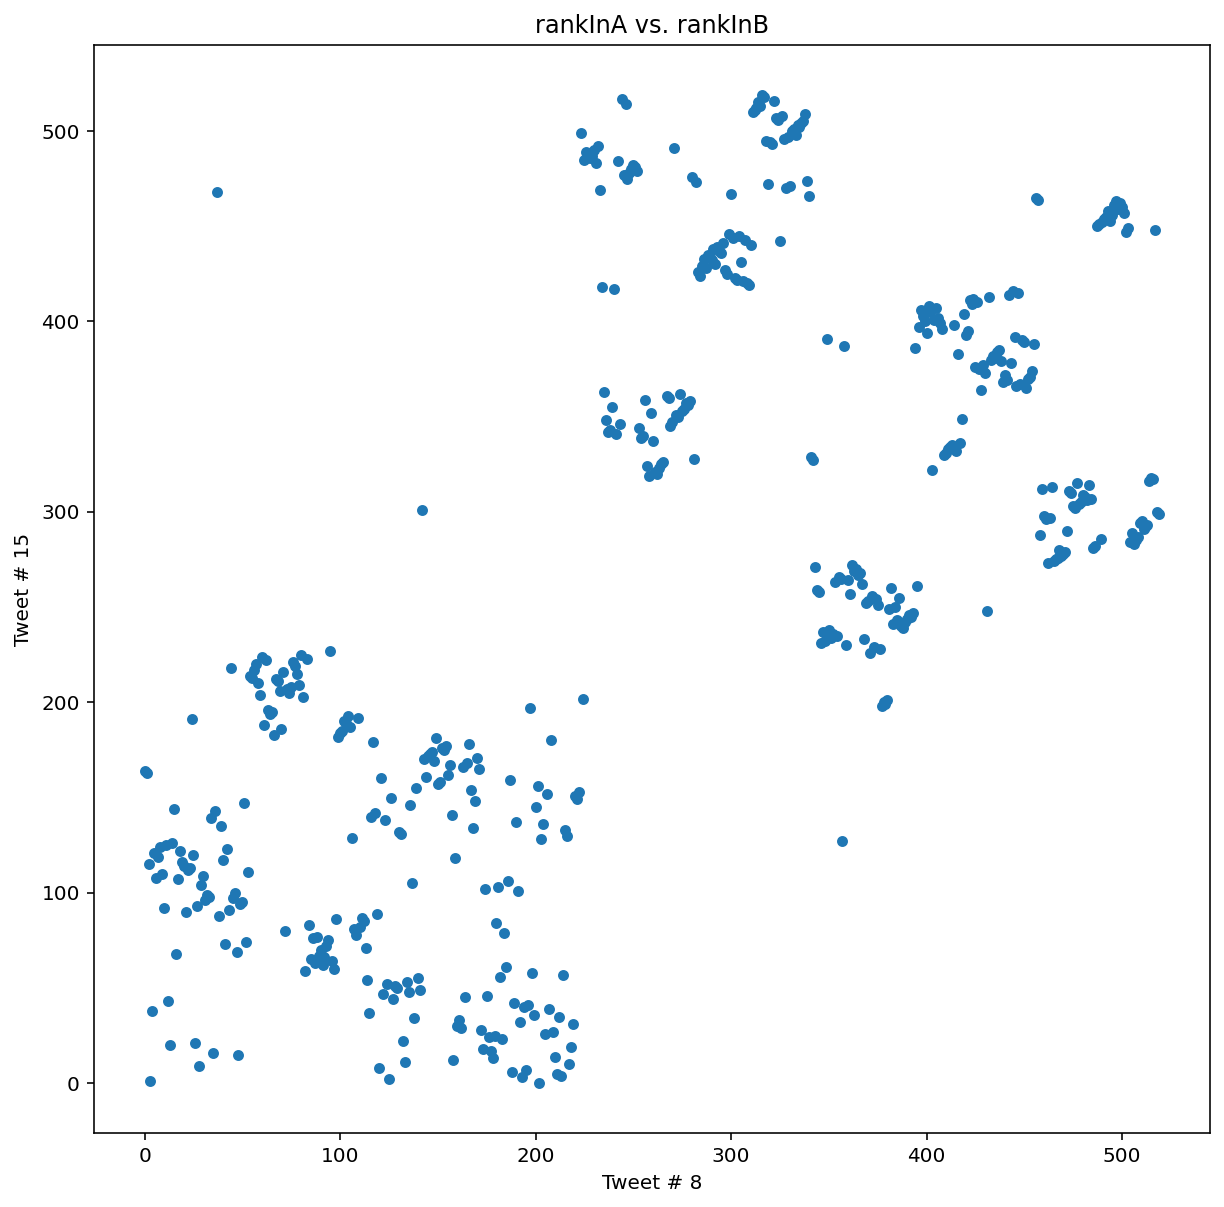

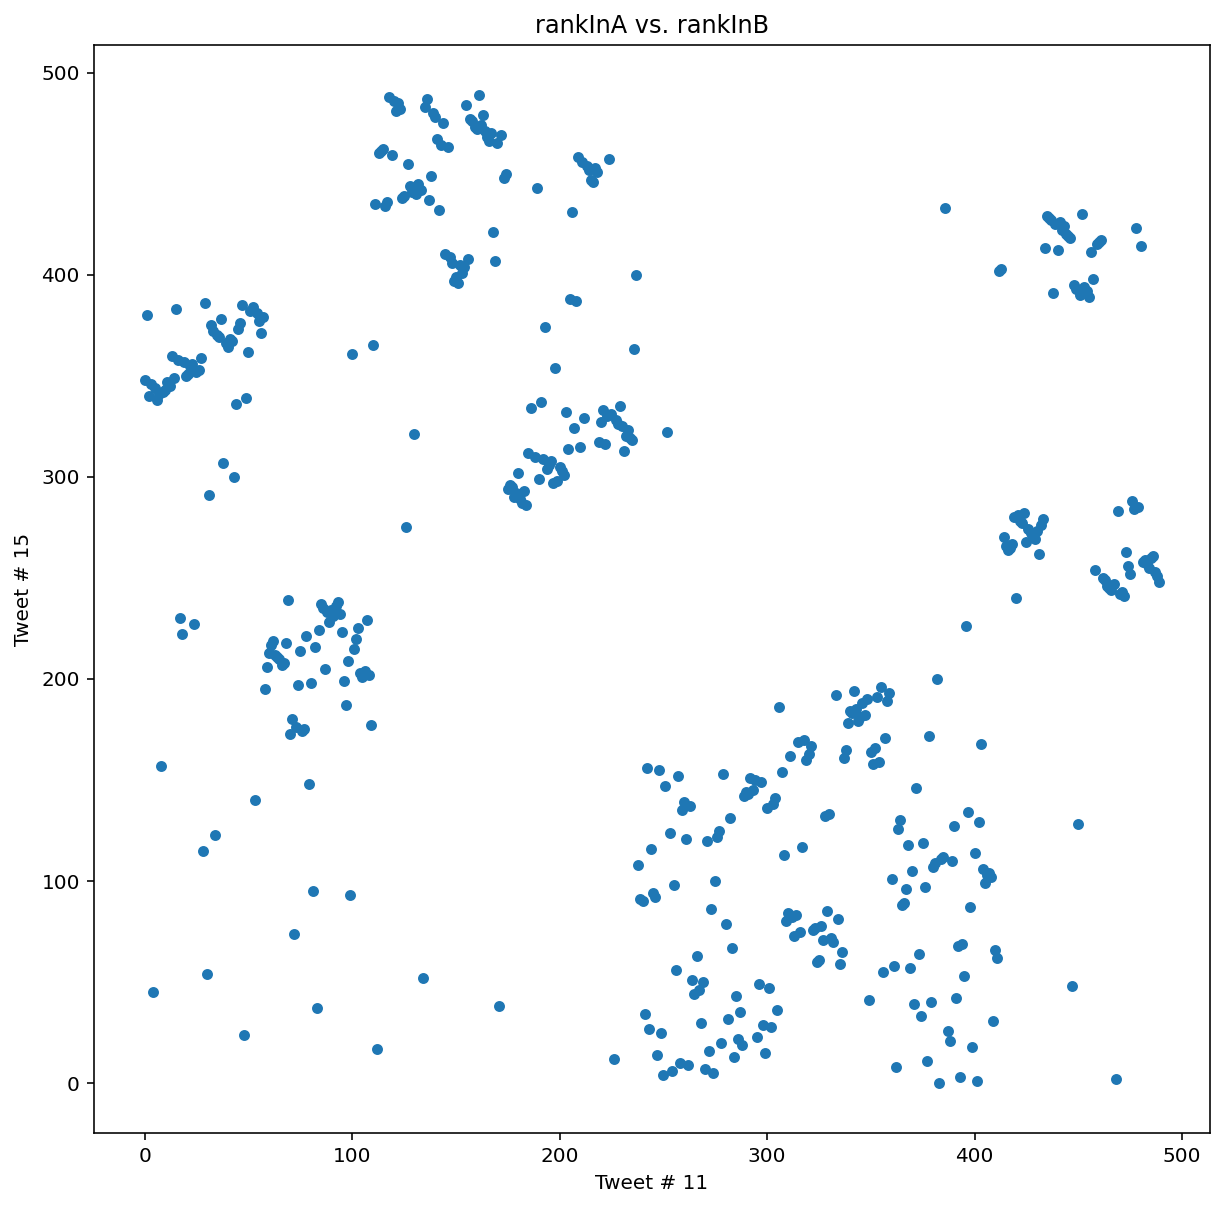

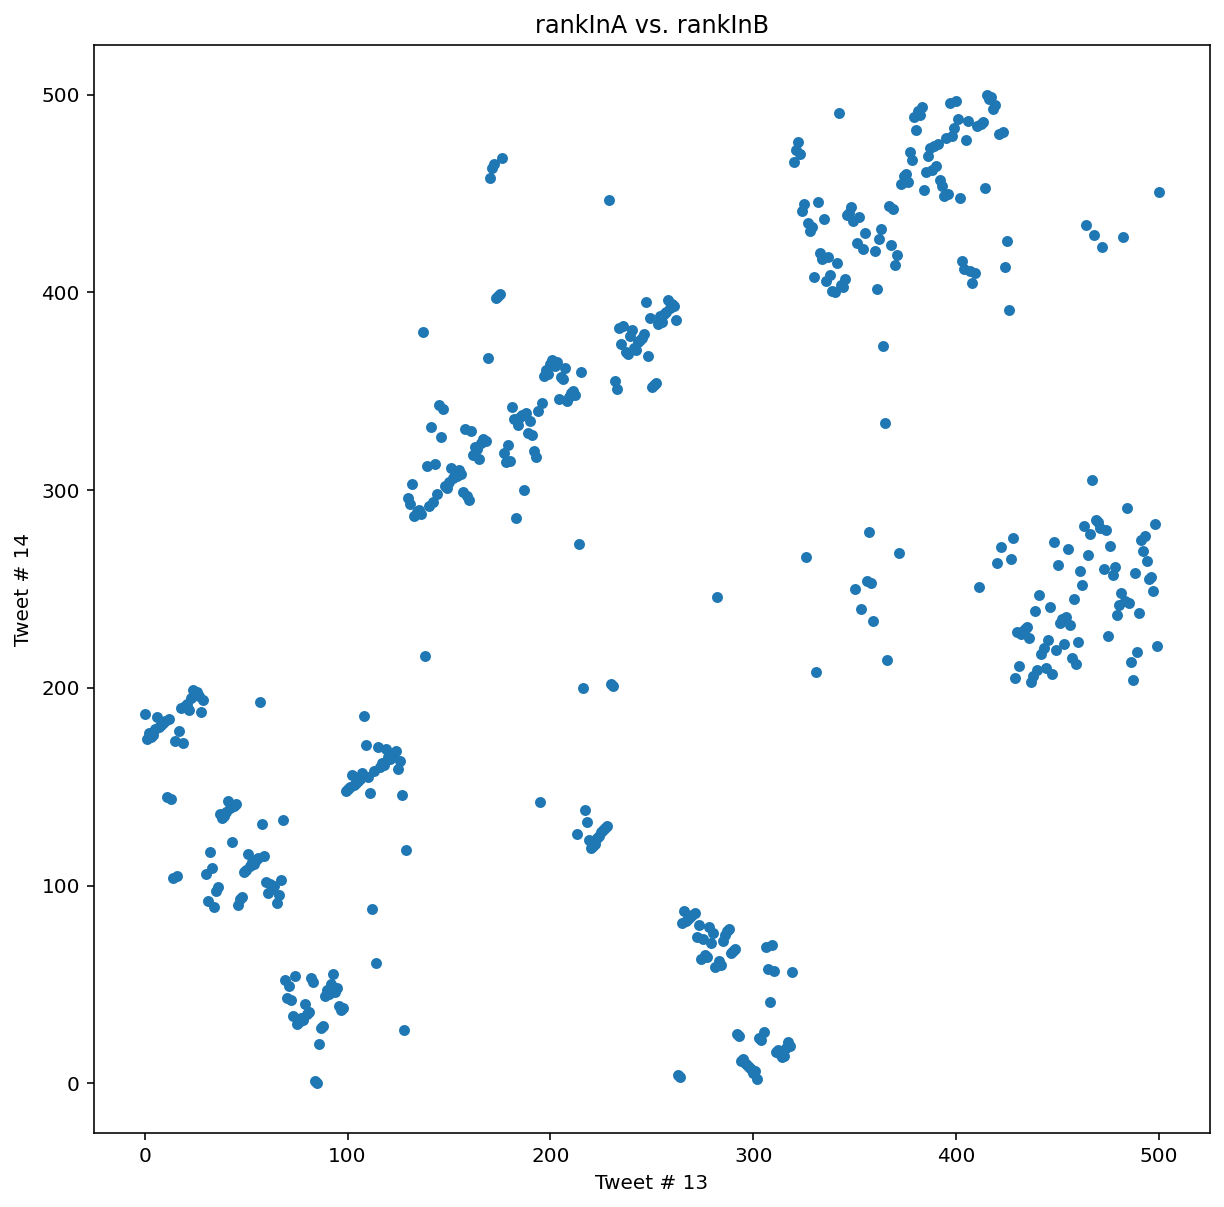

In [221]:
results = []

for A in retweets_after_trump.keys():
    for B in retweets_after_trump.keys():
        if B > A:
            print("Tweets: {}, {}".format(A, B))
            print("--------------------")
            df2, sr = rank_twitterers(retweets_after_trump[A], retweets_after_trump[B])
            if df2 is not None:
                ax = df2.plot(kind='scatter',x='rankInA',y='rankInB', figsize=(10,10))
                ax.set_title("rankInA vs. rankInB")
                ax.set_xlabel("Tweet # {}".format(A))
                ax.set_ylabel("Tweet # {}".format(B))
                ax.get_figure().savefig('figs/{}_{}.png'.format(A,B))
            print()
            